# Data pre-processing - perform all the necessary preprocessing on the data.

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sns.set(color_codes = True)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn import metrics

# Loading the dataset

In [2]:
vehicle_data = pd.read_csv('vehicle.csv')
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# Shape of the data and datatypes of each columns

In [3]:
vehicle_data.shape

(846, 19)

The dataset has 846 rows and 19 columns

In [4]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

There are total 19 columns- 
  one target column - 'class'
    18 predictor variables.
There are some null values.

# Checking null values

In [5]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are missing values in the dataset. Before we train a model, we have to deal with missing values present in the dataset.
Hence we will replace missing values with the columns mean values.

In [6]:
vehicle_data.fillna(vehicle_data.mean(), inplace = True)
vehicle_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Now we can see that there are no missing values in any of the column.

# Converting the categorical values into numerical values for traget column.

In [7]:
# label encode the target class
labelencoder = LabelEncoder()
vehicle_data['class'] = labelencoder.fit_transform(vehicle_data['class'])
vehicle_data['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

Here 1 - car
     0 - bus
     2 - van
         Therefore, number of cars are almost double as compared to bus and van.

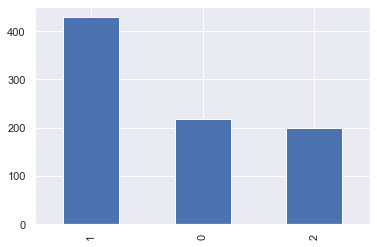

In [8]:
# display how many are car, bus and van
pd.value_counts(vehicle_data["class"]).plot(kind = "bar")

# Statistics discription of the dataset

In [9]:
vehicle_data.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

 From above data we observe that - compactness has mean and median values is almost similar, it signifies that it is normally 
    distributed and has no skewness and outlier.
    circularity - it also seems to be normally distributed.
    scatter_ratio , scaled variance , scaled variance 1 seems to be having some skewness and outlier.


# Checking the outliers,we use boxplot

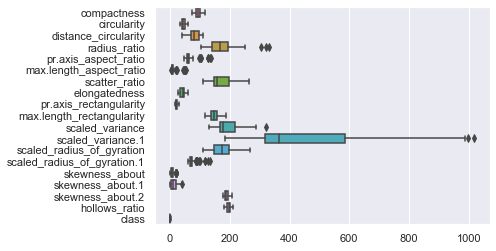

In [10]:
sns.boxplot(data= vehicle_data, orient = "h")

From above box plot, we observe that radius_ratio, pr.axis_aspect_ratio, max_legth_aspect_ratio,scaled_variance,scaled_variance1
,scaled_radius_of_gyration1,skewness_about and skewness_about1 have outliers, which are visible by black dots.

Dealing with outliers

In [11]:
from scipy.stats import iqr

Q1 = vehicle_data.quantile(0.25)
Q3 = vehicle_data.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [12]:
cleandf = vehicle_data[~((vehicle_data < (Q1 - 1.5*IQR)) |(vehicle_data > (Q3 + 1.5*IQR))).any(axis = 1)] 
cleandf.shape

(813, 19)

# After dealing with outliers , now we have 813 rows and 19 columns.

# To plot the boxplot for visualization the outliers are removed

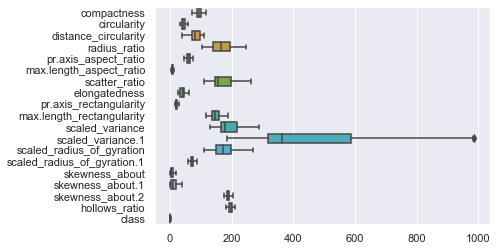

In [13]:
sns.boxplot(data = cleandf, orient = "h")

we can see that all the attributes which had outliers have been removed.

# Understanding the attributes and finding the relationship between different attributes

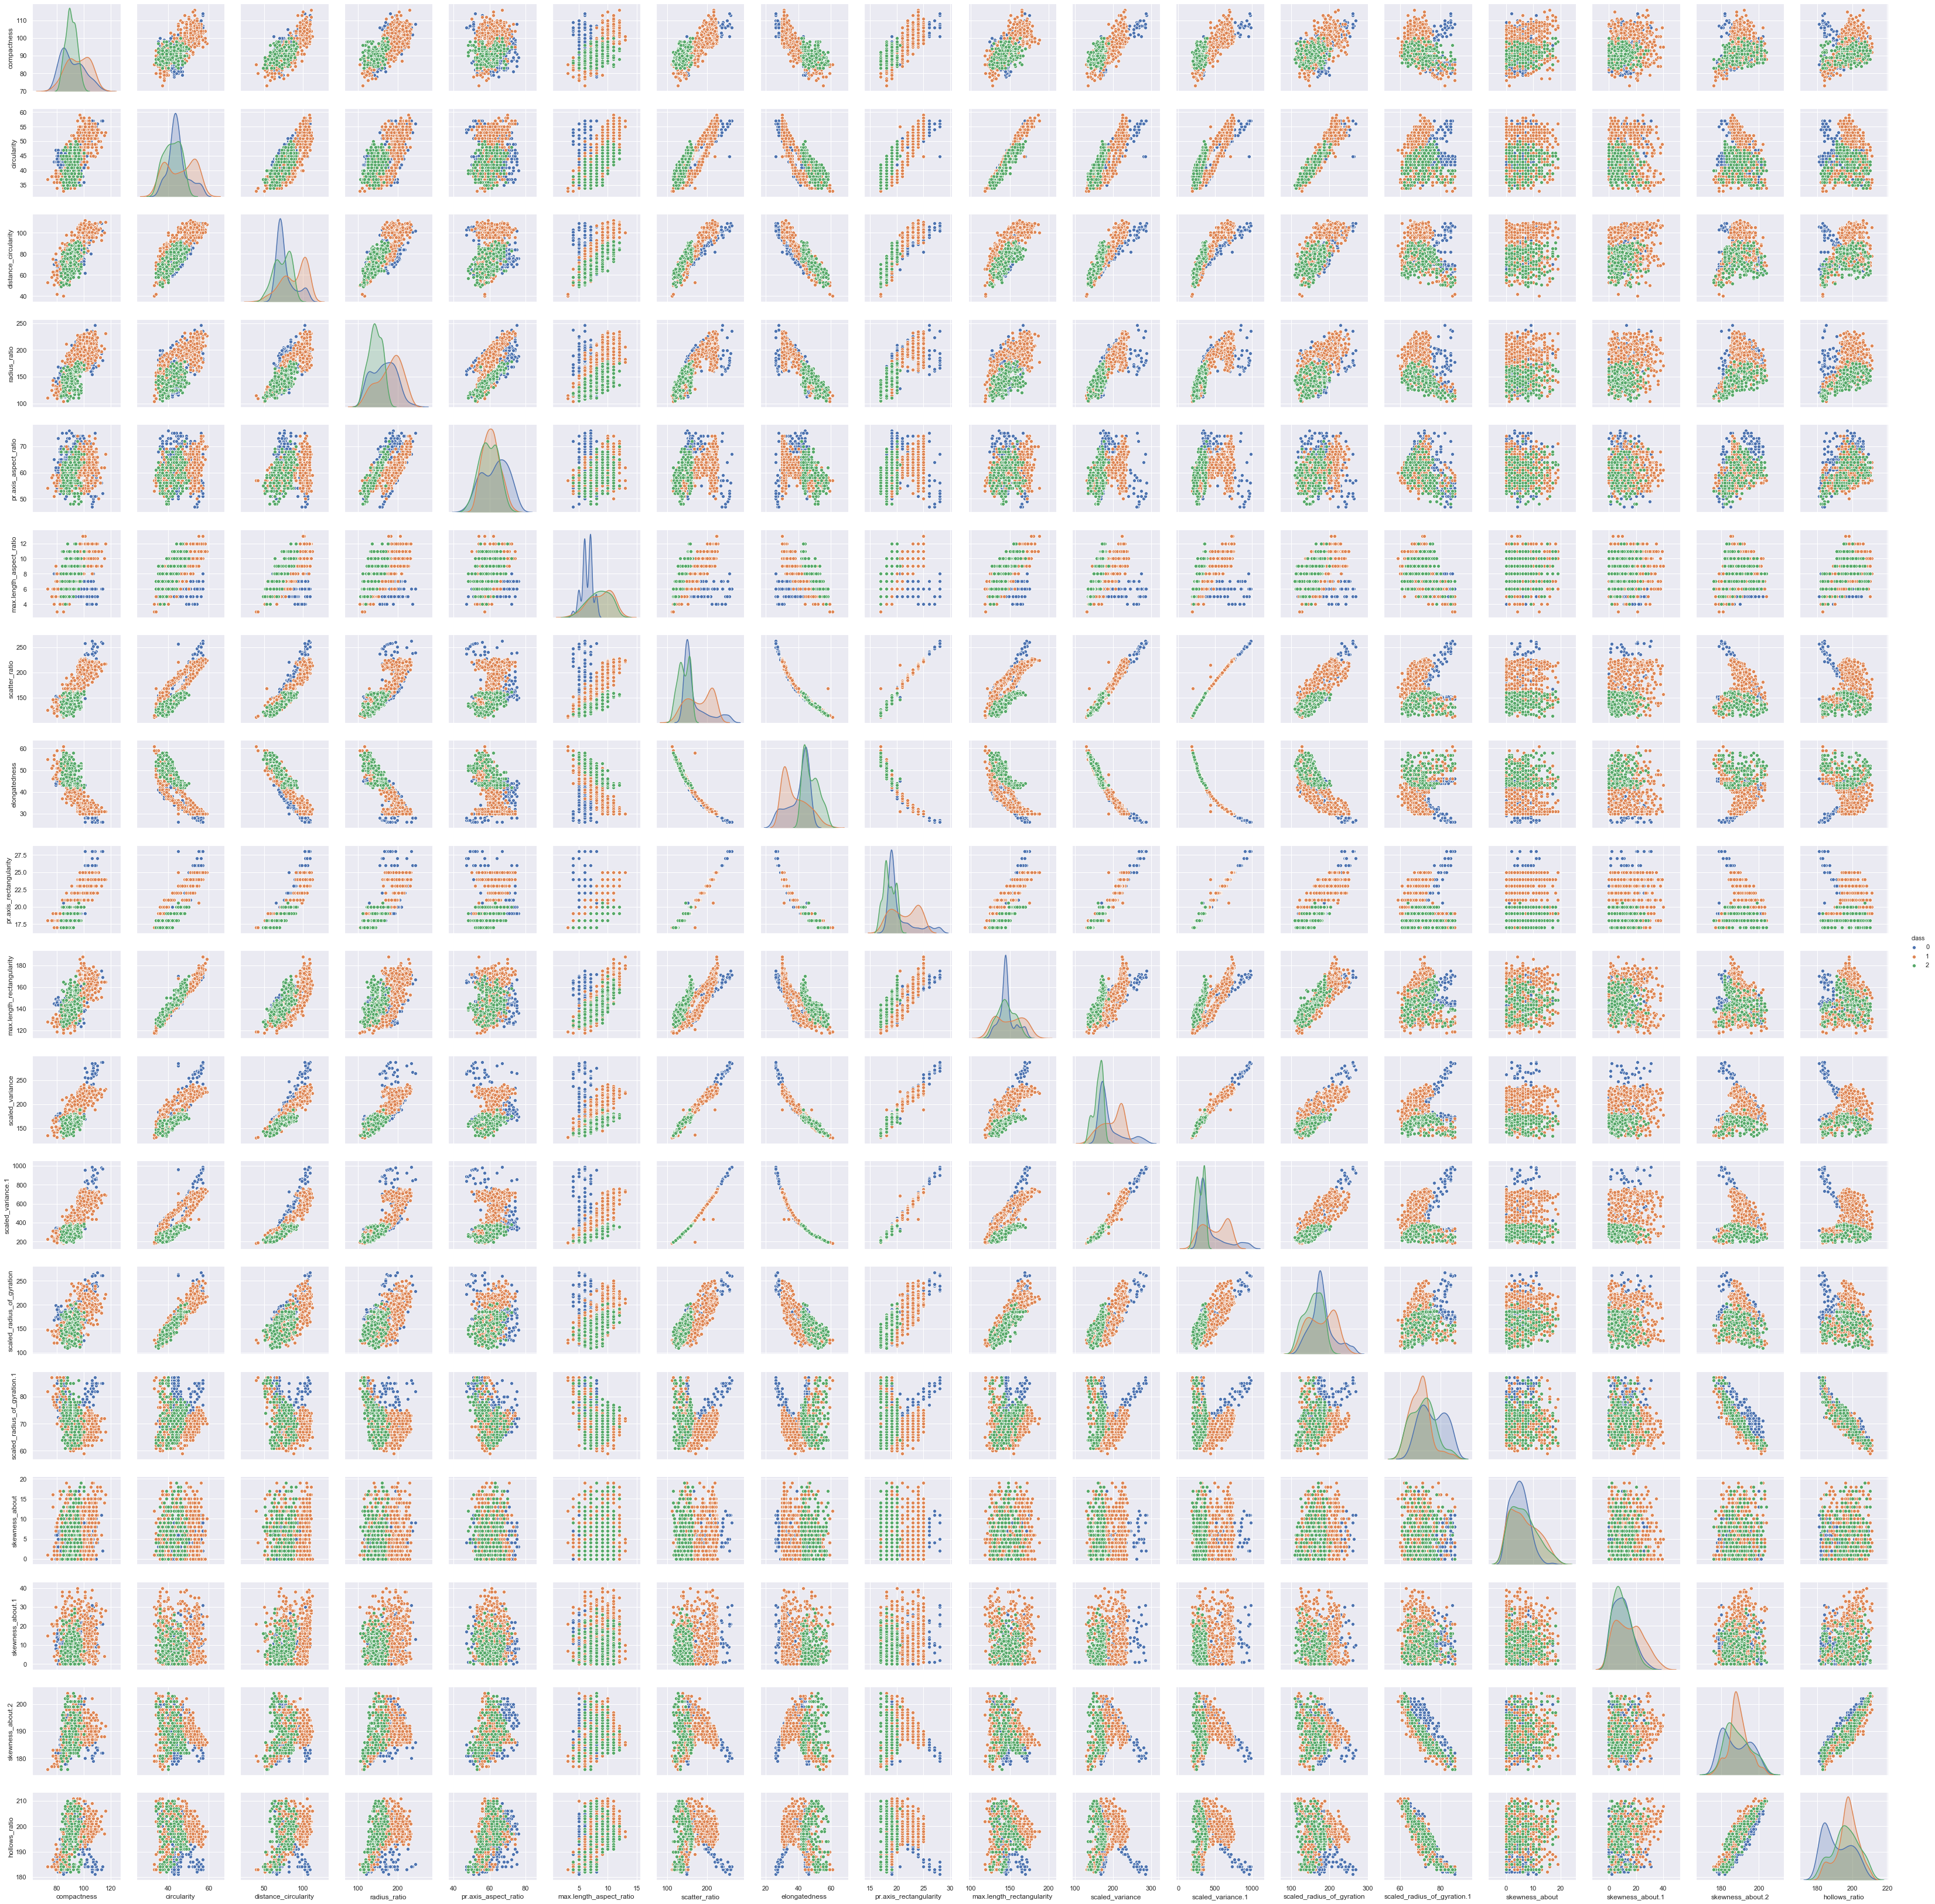

In [14]:
# Let us check for pairplot
sns.pairplot(cleandf, diag_kind ='kde',hue = 'class')
plt.show()

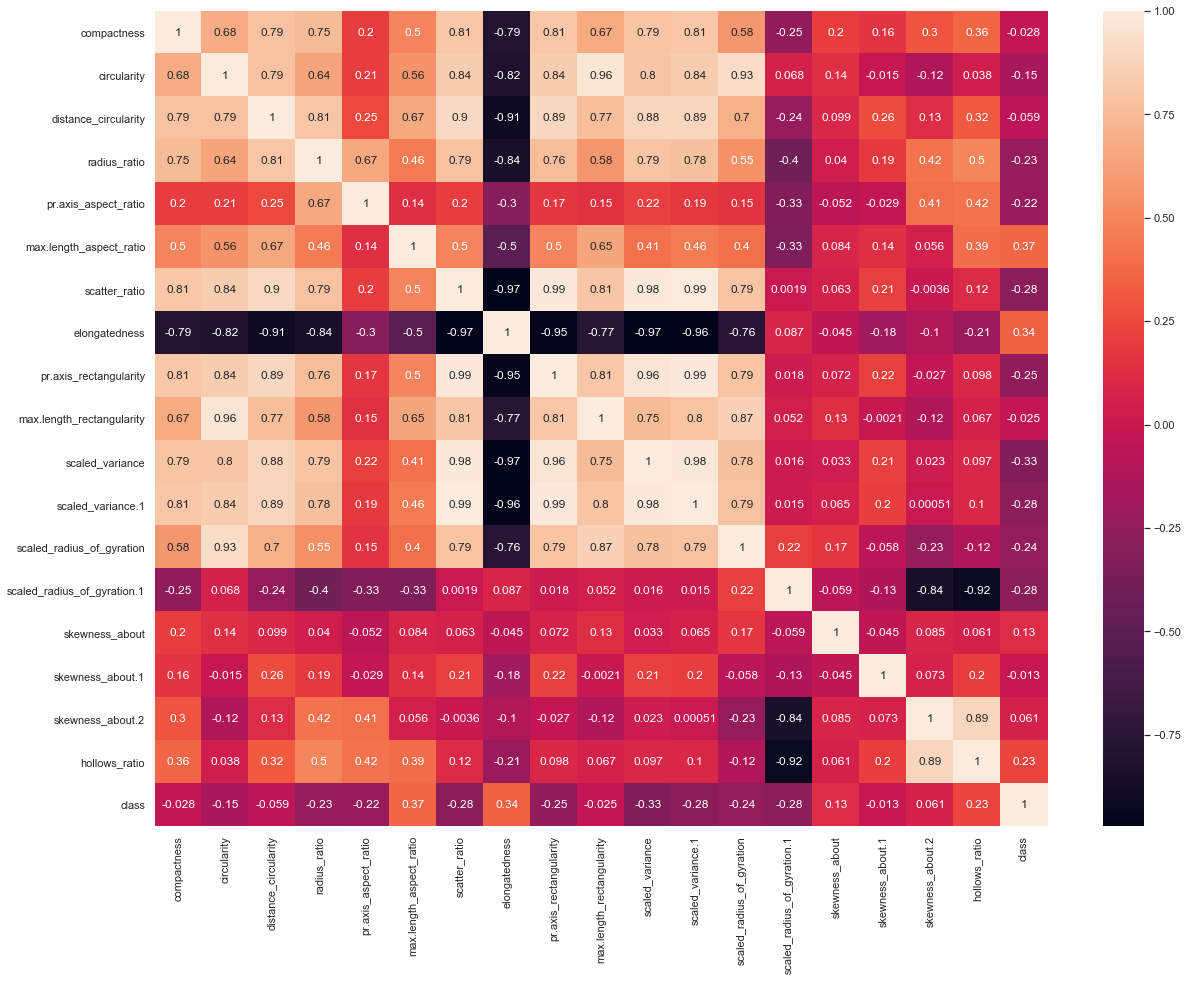

In [15]:
plt.figure(figsize = (20,15))
sns.heatmap(cleandf.corr(), annot = True)
plt.show()

Observations -
  The above heatmap gives us the correlation matrix, where we can see which features are highly correlated.
    We know that if two features are highly correlated then there is no use of using both features.
    Here we observe that scatter_ratio,scaled_variance, scaled_variance 1, max_length_rectangularly, scatter_ratio, skewness_about 2, pr.axis_rectangularity are highly correlated.
    As, there are features which are correlated will drop them to make the features truly independent.
    We will be achieving this by using PCA technique for dimensionality reduction.

# Distribution of all the independent variables individually


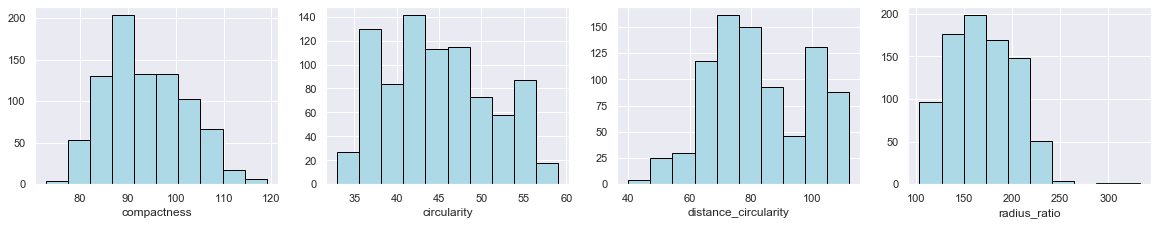

In [16]:
plt.figure(figsize =(20,15))
plt.subplot(4,4,1)
plt.hist(vehicle_data['compactness'], color ='lightblue', edgecolor ='black')
plt.xlabel('compactness')

plt.subplot(4,4,2)
plt.hist(vehicle_data['circularity'], color ='lightblue', edgecolor ='black')
plt.xlabel('circularity')

plt.subplot(4,4,3)
plt.hist(vehicle_data['distance_circularity'], color ='lightblue', edgecolor ='black')
plt.xlabel('distance_circularity')


plt.subplot(4,4,4)
plt.hist(vehicle_data['radius_ratio'], color ='lightblue', edgecolor ='black')
plt.xlabel('radius_ratio')
plt.show()

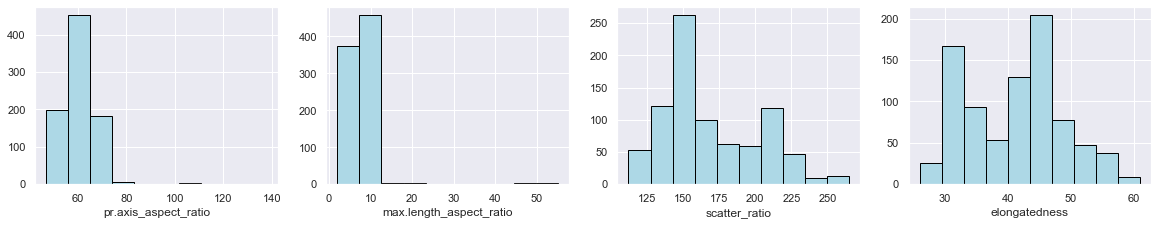

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
plt.hist(vehicle_data['pr.axis_aspect_ratio'], color = 'lightblue', edgecolor ='black')
plt.xlabel('pr.axis_aspect_ratio')

plt.subplot(4,4,2)
plt.hist(vehicle_data['max.length_aspect_ratio'], color = 'lightblue', edgecolor ='black')
plt.xlabel('max.length_aspect_ratio')

plt.subplot(4,4,3)
plt.hist(vehicle_data['scatter_ratio'], color = 'lightblue', edgecolor ='black')
plt.xlabel('scatter_ratio')

plt.subplot(4,4,4)
plt.hist(vehicle_data['elongatedness'], color = 'lightblue', edgecolor ='black')
plt.xlabel('elongatedness')

plt.show()

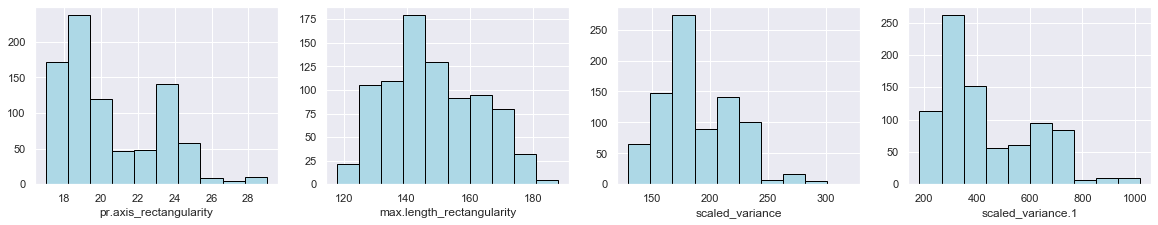

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
plt.hist(vehicle_data['pr.axis_rectangularity'], color ='lightblue', edgecolor ='black')
plt.xlabel('pr.axis_rectangularity')

plt.subplot(4,4,2)
plt.hist(vehicle_data['max.length_rectangularity'], color ='lightblue', edgecolor ='black')
plt.xlabel('max.length_rectangularity')


plt.subplot(4,4,3)
plt.hist(vehicle_data['scaled_variance'], color = 'lightblue', edgecolor ='black')
plt.xlabel('scaled_variance')


plt.subplot(4,4,4)
plt.hist(vehicle_data['scaled_variance.1'], color = 'lightblue', edgecolor ='black')
plt.xlabel('scaled_variance.1')

plt.show()

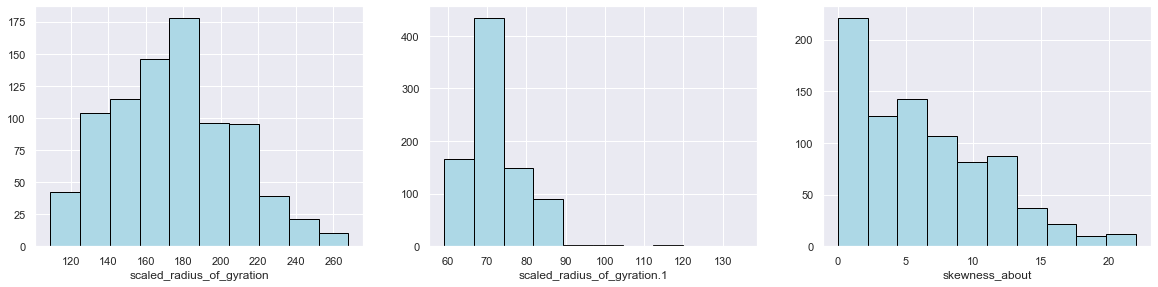

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(vehicle_data['scaled_radius_of_gyration'], color = 'lightblue', edgecolor = 'black')
plt.xlabel('scaled_radius_of_gyration')

plt.subplot(3,3,2)
plt.hist(vehicle_data['scaled_radius_of_gyration.1'], color = 'lightblue', edgecolor = 'black')
plt.xlabel('scaled_radius_of_gyration.1')


plt.subplot(3,3,3)
plt.hist(vehicle_data['skewness_about'], color = 'lightblue', edgecolor = 'black')
plt.xlabel('skewness_about')

plt.show()

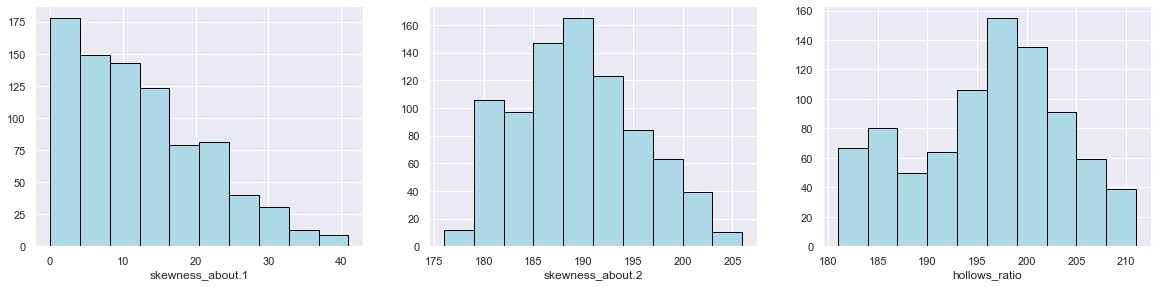

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(vehicle_data['skewness_about.1'], color = 'lightblue', edgecolor = 'black')
plt.xlabel('skewness_about.1')

plt.subplot(3,3,2)
plt.hist(vehicle_data['skewness_about.2'], color = 'lightblue', edgecolor = 'black')
plt.xlabel('skewness_about.2')

plt.subplot(3,3,3)
plt.hist(vehicle_data['hollows_ratio'], color = 'lightblue', edgecolor = 'black')
plt.xlabel('hollows_ratio')

plt.show()

observations - Most of the data attributes seems to be normally distributed.
   scaled variance 1, scaled variance ,skewnessabout 1 and scatter_ratio seems to be right skewed.

# Standardise the data

In [21]:
# scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cleandf.drop(columns = 'class'))
scaled_df

array([[ 0.17225234,  0.52346631,  0.05374672, ...,  0.37927675,
        -0.32496011,  0.17675882],
       [-0.3243475 , -0.62282522,  0.1181422 , ...,  0.15497162,
         0.00243238,  0.4491852 ],
       [ 1.289602  ,  0.85097817,  1.53484283, ..., -0.40579121,
        -0.16126386,  0.04054562],
       ...,
       [ 1.53790192,  1.5060019 ,  1.21286542, ..., -0.96655403,
        -0.32496011,  0.72161158],
       [-0.94509731, -1.44160488, -0.2682307 , ...,  1.38864983,
         0.16612863, -0.09566757],
       [-1.06924727, -1.44160488, -1.0409765 , ...,  0.60358188,
        -0.48865636, -0.77673352]])

# Split the data in to train and test data set

In [22]:
X = scaled_df
y = cleandf['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
X_train

array([[-1.06924727,  0.03219851, -0.78339456, ..., -0.96655403,
        -1.30713759, -1.59401267],
       [ 0.79300215,  0.52346631,  0.82649252, ..., -0.18148608,
         0.49352113, -0.23188076],
       [-0.3243475 , -0.45906929,  0.1181422 , ..., -0.06933351,
         1.14830611,  0.72161158],
       ...,
       [-0.3243475 , -0.95033708,  0.05374672, ..., -0.29363864,
        -0.16126386, -0.23188076],
       [-1.06924727, -1.76911674, -1.87811778, ...,  0.82788701,
        -0.6523526 , -0.91294672],
       [-1.56584711,  0.03219851, -0.91218553, ..., -1.41516429,
        -0.9797451 , -0.91294672]])

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 18)
(244, 18)
(569,)
(244,)


# Train a support vector machine using the train set and get the accuracy on the test set

In [24]:
# building a support vector machine on train data
from sklearn.svm import SVC
model = SVC(gamma = 'auto')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# accuracy on test data
score_using_actual_attributes =  model.score(X_test, y_test)
print(score_using_actual_attributes)

0.9795081967213115


In [26]:
prediction = model.predict(X_test)

In [27]:
print(classification_report(y_test, prediction, digits = 2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       0.98      0.98      0.98       121
           2       0.98      0.93      0.95        45

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244



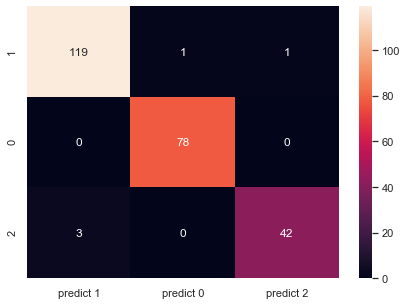

In [28]:
# print confusion matrix
conf_mat = metrics.confusion_matrix(y_test, prediction, labels =[1,0,2])
cleandf_conf_mat = pd.DataFrame(conf_mat, index = [i for i in ["1","0","2"]],
                               columns = [i for i in ["predict 1","predict 0","predict 2"]])
plt.figure(figsize =(7,5))
sns.heatmap(cleandf_conf_mat, annot = True, fmt = 'g')

# Perform k-fold cross  validation and get the cross validation score of the model

In [29]:
model =SVC(C= 1, kernel = 'rbf', gamma = 'auto')
scores = cross_val_score(model, X, y, cv = 10)
CV_score = scores.mean()
print(CV_score)

0.9680367359229148


# Use PCA from Scikit learn, extract Principal components that capture about 95% of the variance in the data.

In [30]:
pca = PCA(n_components = 18)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
# generating the covariance matrix and the eigenvalues for the PCA analysis
cov_matrix = np.cov(X_train.T)
print('Covariance matrix /n%s', cov_matrix)

Covariance matrix /n%s [[ 1.00578205e+00  7.06564914e-01  8.07065171e-01  7.65078460e-01
   2.09136780e-01  5.09684224e-01  8.31725837e-01 -8.11361803e-01
   8.33805334e-01  7.01500249e-01  8.13107505e-01  8.33190559e-01
   6.08412043e-01 -2.37445671e-01  1.58165603e-01  1.70798921e-01
   2.79247122e-01  3.49123664e-01]
 [ 7.06564914e-01  1.03315047e+00  8.35491188e-01  6.95814890e-01
   2.45121239e-01  6.04498555e-01  8.78841689e-01 -8.60179341e-01
   8.78474386e-01  9.87318793e-01  8.38963308e-01  8.65159324e-01
   9.56944245e-01  4.29669165e-02  1.25096351e-01  4.04857876e-02
  -1.04394288e-01  6.61436630e-02]
 [ 8.07065171e-01  8.35491188e-01  1.04751576e+00  8.55668943e-01
   2.86738038e-01  7.13791276e-01  9.43150382e-01 -9.55896795e-01
   9.35287743e-01  8.13881559e-01  9.20461244e-01  9.24045752e-01
   7.44302458e-01 -2.53439205e-01  6.52540501e-02  2.94030149e-01
   1.32878532e-01  3.42060192e-01]
 [ 7.65078460e-01  6.95814890e-01  8.55668943e-01  1.03818152e+00
   6.89814719e

In [32]:
# generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors /n%s' %e_vecs)
print('/nEigenvalues /n%s' %e_vals)

Eigenvectors /n[[-2.66605297e-01 -7.62007366e-02  6.50598723e-02  9.72718082e-02
  -1.63080676e-01  2.87407747e-01  1.70431039e-01 -7.70133779e-01
   3.30900205e-01  1.75383562e-01  1.65522280e-02 -1.56669918e-02
  -9.36827415e-02  1.63785856e-01 -2.23902248e-02  3.29328730e-02
   1.02586533e-02  1.41624899e-03]
 [-2.85935862e-01  1.26769669e-01  1.74334917e-01 -7.94257390e-02
   1.71215278e-01 -6.95098919e-02 -3.88481525e-01 -6.41978529e-02
   9.18645324e-02 -2.65056150e-01  5.45151983e-02  2.17591724e-01
  -3.87121715e-01 -2.75302610e-01 -3.98328000e-01  3.98676957e-01
  -5.86622842e-03 -6.30386633e-02]
 [-3.02581152e-01 -4.65423746e-02 -2.88259873e-02  1.30031392e-01
   7.42106185e-02 -2.61956818e-02  1.88649125e-01  2.74365119e-01
   2.94435835e-01  4.09464264e-02  7.28679095e-01 -3.45610411e-01
   1.82349706e-02 -9.80866916e-02 -1.18165431e-01 -8.99990078e-02
  -2.20258633e-02  1.38137569e-02]
 [-2.75490828e-01 -1.96576178e-01 -1.11204135e-01 -2.27587716e-01
  -1.36771363e-01 -1.4

In [33]:
# the cumulative variance explained analysis
tot = sum(e_vals)
var_exp = [(i/tot)* 100 for i in sorted(e_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance Explained", cum_var_exp)

Cumulative variance Explained [ 55.65273825  73.52866401  80.1841036   86.34370898  91.11409752
  94.78424082  96.5049286   97.7758627   98.41434784  98.83397765
  99.16440851  99.41915071  99.58682026  99.72741151  99.83609262
  99.92904304  99.97630564 100.        ]


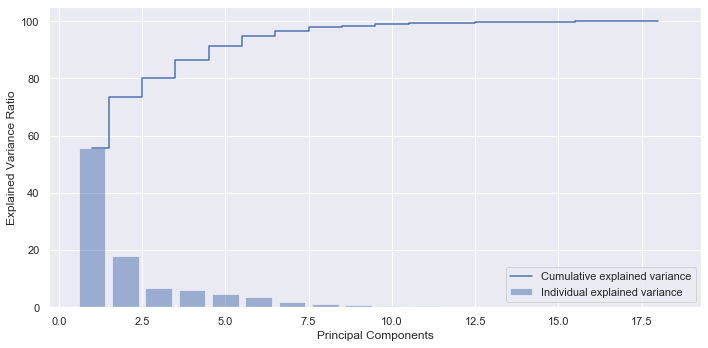

In [34]:
# plotting the variance  explained by the principal components and the cumulative variance explained.
plt.figure(figsize = (10,5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

# From above plot, we observe that 8 Principal components and it captures more than 95% of the variance in the data.

# Use Principal components instead of the original data. Train support vector machine and get the accuracy on test data

# 1: Split the dataset into training and test data

In [35]:
pca = PCA(n_components = 8)

X = pca.fit_transform(scaled_df)
y = cleandf['class']
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
pca_X_train.shape, pca_X_test.shape, pca_y_train.shape, pca_y_test.shape

((569, 8), (244, 8), (569,), (244,))

# 2 : Train a suppport vector machine and find the accuracy on test data

In [36]:
model = SVC(gamma = 'auto')
model.fit (pca_X_train, pca_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
# accuracy on the test data
score_PCs = model.score(pca_X_test, pca_y_test)
print(score_PCs)

0.9672131147540983


In [38]:
prediction = model.predict(pca_X_test)

In [39]:
print(classification_report(pca_y_test, prediction, digits = 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        78
           1       0.97      0.98      0.97       121
           2       0.98      0.89      0.93        45

    accuracy                           0.97       244
   macro avg       0.97      0.95      0.96       244
weighted avg       0.97      0.97      0.97       244



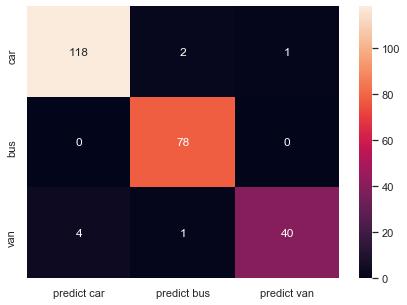

In [40]:
# confusion_matrix
conf_mat = metrics.confusion_matrix(pca_y_test, prediction, labels =[1,0,2])
cleandf_conf_mat = pd.DataFrame(conf_mat, index =[ i for i in ["car","bus","van"]],
                               columns = [i for i in ["predict car","predict bus","predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(cleandf_conf_mat, annot = True, fmt = 'g')


# 3 : Perform K-fold cross validation on the principal components analysis and get the cross validation score of the model.

In [41]:
model = SVC(C = 1, kernel = "rbf", gamma = 'auto')
scores = cross_val_score(model, X, y, cv = 10)
CV_score_pca = scores.mean()
print(CV_score_pca)

0.958175248419151


# Compare the accuracy scores and cross validation scores of support vector machines- one trained using raw data and the other using the principal components and mention the findings.


In [42]:
matrix = pd.DataFrame({'SVC' : ['All scaled attributes', '8 Principle components'],
                      'Accurcay': [score_using_actual_attributes, score_PCs],
                       'Cross- validation score': [CV_score, CV_score_pca]})
matrix
                      
                    

SVC  Accurcay  Cross- validation score
0   All scaled attributes  0.979508                 0.968037
1  8 Principle components  0.967213                 0.958175

From the above, we can analyze that Pca is performing better in terms of accuracy with respect to raw data.
Wherein, Accuracy of pca is approx 97% and for raw data it is approx 98%. 
However,The observed accurcay for Pca is calculted by using 8 dimensions where as raw data was caluclated by using 18 dimensions.
Therefore, SVM with PCA transformed data would be the best choice to classify a given silhouette as one of three types of vehicle.